In [18]:
#import library
import pandas as pd
from sklearn.preprocessing import  MinMaxScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [19]:

df = pd.read_csv('FOOD-DATA-GROUP5.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
print(df.head())
print(df.info())
print(df.describe())

# Tăng chiều rộng và hiển thị đầy đủ các cột
pd.set_option('display.max_columns', None)  # Không giới hạn số lượng cột
pd.set_option('display.width', 1000)       # Tăng chiều rộng dòng hiển thị
pd.set_option('display.max_colwidth', None)  # Không giới hạn độ dài của cột văn bản

# Kiểm tra dữ liệu thiếu
print(df.isnull().sum())


   Unnamed: 0.1  Unnamed: 0                    food  Caloric Value    Fat  Saturated Fats  Monounsaturated Fats  Polyunsaturated Fats  Carbohydrates  Sugars  Protein  Dietary Fiber  Cholesterol  Sodium  Water  Vitamin A  Vitamin B1  Vitamin B11  Vitamin B12  Vitamin B2  Vitamin B3  Vitamin B5  Vitamin B6  Vitamin C  Vitamin D  Vitamin E  Vitamin K  Calcium  Copper   Iron  Magnesium  Manganese  Phosphorus  Potassium  Selenium   Zinc  Nutrition Density
0             0           0  margarine with yoghurt             88    9.8             1.9                   5.6                   2.0          0.073     0.0    0.058            0.0          0.0   0.018    3.9        0.1       0.074        0.086        0.073       0.005       0.097         0.0       0.075      0.082      0.000        0.7      0.002      2.8   0.001  0.027        0.3        0.0         2.2        3.5     0.000  0.008             12.971
1             1           1   sunflower seed butter             99    8.8             0.7 

In [20]:

# Tách các cột số cần chuẩn hóa (nếu không được chỉ định, tự động chọn tất cả các cột số)
numeric_columns = [
    'Caloric Value', 'Fat', 'Carbohydrates', 'Sugars', 'Protein',
    'Dietary Fiber', 'Cholesterol', 'Sodium', 'Water',
    'Calcium', 'Iron', 'Magnesium', 'Manganese' , 'Selenium', 
    'Phosphorus', 'Potassium', 'Zinc' , 
]

epsilon = 1e-3  # Giá trị nhỏ để thay thế 0
df[numeric_columns] = df[numeric_columns].replace(0, epsilon) # Xử lý các giá trị bằng 0

# Chuẩn hóa bằng Min-Max Scaling
scaler = MinMaxScaler()
food_data= df[numeric_columns].copy()
food_data[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Hiển thị dữ liệu
print("Dữ liệu sau khi chuẩn hóa (Min-Max Scaling):")
print(food_data.head())

Dữ liệu sau khi chuẩn hóa (Min-Max Scaling):
   Caloric Value       Fat  Carbohydrates    Sugars   Protein  Dietary Fiber  Cholesterol    Sodium     Water   Calcium      Iron  Magnesium  Manganese  Selenium  Phosphorus  Potassium      Zinc
0       0.026379  0.044950       0.000379  0.000000  0.000664       0.000000     0.000000  0.000344  0.005346  0.003225  0.000890   0.000400   0.000000  0.000000    0.001679   0.000863  0.000295
1       0.029676  0.040363       0.019458  0.016181  0.032623       0.015342     0.000000  0.001296  0.000136  0.011750  0.023939   0.066683   0.000663  0.000022    0.081411   0.022748  0.033715
2       0.035971  0.062381       0.000000  0.000000  0.000000       0.000000     0.000000  0.000000  0.000000  0.000000  0.000000   0.000000   0.000000  0.000000    0.000000   0.000000  0.000000
3       0.589328  1.000000       0.000000  0.000000  0.000000       0.000000     1.000000  0.000000  0.000000  0.000000  0.000000   0.000000   0.000000  0.000000    0.000000  

               gout Disease Risk  Diabetes Risk  Cancer Risk  Gout Risk  Hypertension Risk
Caloric Value           0.223858       0.082910     0.492988   0.430377          -0.018759
Fat                     0.339160      -0.021959     0.759982   0.238531          -0.009827
Carbohydrates          -0.021936       0.258540    -0.049154   0.294636          -0.021936
Sugars                 -0.011811       0.777015    -0.026466  -0.020114          -0.011811
Protein                -0.015561      -0.017389    -0.034869   0.784430          -0.015561
Dietary Fiber          -0.015670       0.047338    -0.035114   0.441018          -0.015670
Cholesterol             0.731194      -0.012893     0.318980   0.375050          -0.004858
Sodium                 -0.004794       0.000628    -0.010743  -0.011911           0.133597
Water                  -0.024043       0.091060    -0.053874   0.074056          -0.024035
Calcium                -0.015308       0.013891    -0.034302   0.330568          -0.013709

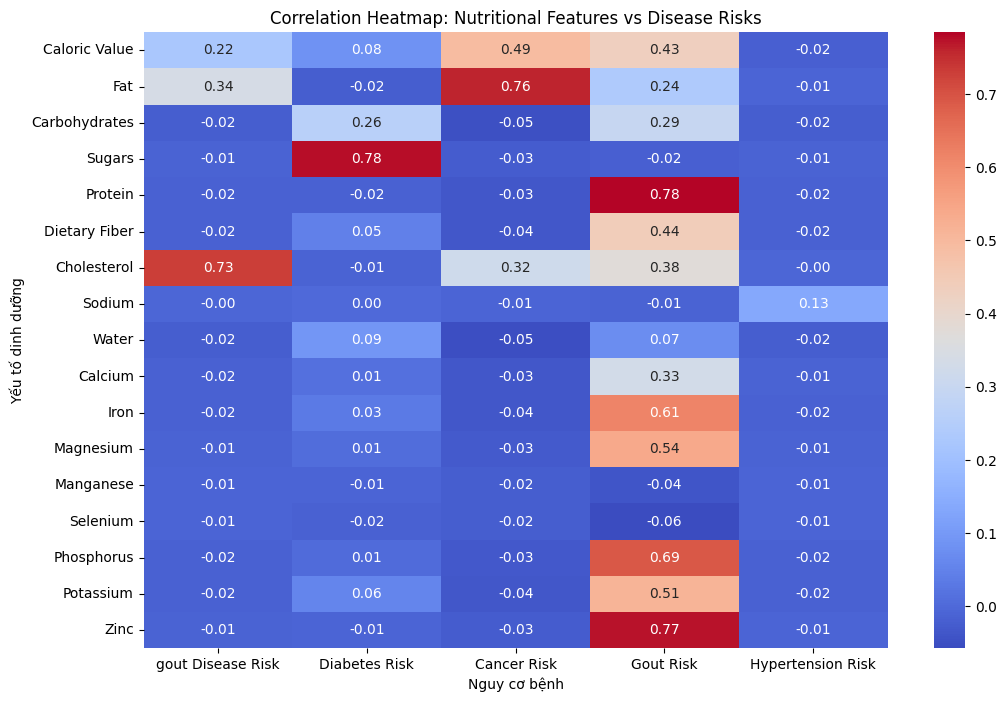

In [21]:
# Giả định các ngưỡng bệnh cho dữ liệu
# Quy đổi các ngưỡng cho dữ liệu chuẩn hóa (khoảng [0, 1])
food_data['Heart Disease Risk'] = ((food_data['Cholesterol'] > 0.66) & (food_data['Fat'] > 0.5)).astype(int) 
food_data['Diabetes Risk'] = ((food_data['Sugars'] > 0.5) & (food_data['Carbohydrates'] > 0.07)).astype(int) 
food_data['Cancer Risk'] = ((food_data['Fat'] > 0.67) & (food_data['Protein'] < 0.3)).astype(int)  
food_data['Gout Risk'] = ((food_data['Protein'] > 0.5)).astype(int)  
food_data['Hypertension Risk'] = ((food_data['Sodium'] > 0.04) & (food_data['Calcium'] < 0.02)).astype(int) 

# Chọn các cột dinh dưỡng và nguy cơ bệnh
nutritional_features = ['Caloric Value', 'Fat', 'Carbohydrates', 'Sugars', 'Protein',
                        'Dietary Fiber', 'Cholesterol', 'Sodium', 'Water',
                        'Calcium', 'Iron', 'Magnesium', 'Manganese' , 'Selenium', 
                        'Phosphorus', 'Potassium', 'Zinc']
disease_columns = ['Heart Disease Risk', 'Diabetes Risk', 'Cancer Risk', 'Gout Risk', 'Hypertension Risk']
# Lọc dữ liệu
subset = food_data[nutritional_features + disease_columns]

# Nếu có NaN, có thể loại bỏ các dòng chứa NaN hoặc điền giá trị thiếu
subset_cleaned = subset.dropna()  # Loại bỏ các dòng chứa NaN

# Tính ma trận tương quan
correlation_matrix = subset_cleaned.corr().loc[nutritional_features, disease_columns]
print(correlation_matrix)

# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Nutritional Features vs Disease Risks')
plt.xlabel('Nguy cơ bệnh')
plt.ylabel('Yếu tố dinh dưỡng')
plt.show()


In [22]:

# Chọn mục tiêu và yếu tố dự đoán
X = food_data[nutritional_features]
y = food_data['Gout Risk']  # bệnh gout

# Chọn 5 yếu tố quan trọng nhất
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Xem các yếu tố quan trọng
important_features = selector.get_support(indices=True)
print("Các yếu tố quan trọng nhất ảnh hưởng tới bệnh Gout:", [nutritional_features[i] for i in important_features])

Các yếu tố quan trọng nhất ảnh hưởng tới bệnh Gout: ['Protein', 'Iron', 'Magnesium', 'Phosphorus', 'Zinc']


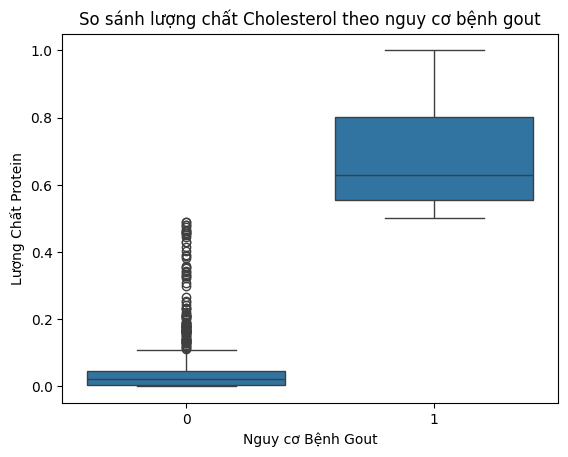

In [23]:
# Biểu đồ boxplot so sánh lượng protein theo nguy cơ bệnh gout
sns.boxplot(x=food_data['Gout Risk'], y=food_data['Protein'])
plt.title('So sánh lượng chất Cholesterol theo nguy cơ bệnh gout')
plt.xlabel('Nguy cơ Bệnh Gout')
plt.ylabel('Lượng Chất Protein')
plt.show()


In [24]:
# Biến mục tiêu (target_gout_Disease): Một trong các cột nguy cơ bệnh
# Biến dự đoán (features_gout_Disease): Các cột chứa thông tin dinh dưỡng 
# Xác định biến mục tiêu và biến dự đoán
target_Gout_Disease = 'Gout Risk'  
features_Gout_Disease = ['Protein', 'Iron', 'Magnesium', 'Phosphorus', 'Zinc']  

X_gout = food_data[features_Gout_Disease]
print("Tập kiểm thử X_gout : \n", X_gout)
y_gout = food_data[target_Gout_Disease]
print("Tập kiểm thử y_gout : \n", y_gout)



Tập kiểm thử X_gout : 
       Protein      Iron  Magnesium  Phosphorus      Zinc
0    0.000664  0.000890   0.000400    0.001679  0.000295
1    0.032623  0.023939   0.066683    0.081411  0.033715
2    0.000000  0.000000   0.000000    0.000000  0.000000
3    0.000000  0.000000   0.000000    0.000000  0.000000
4    0.000000  0.000000   0.000000    0.000000  0.000000
..        ...       ...        ...         ...       ...
949  0.050105  0.202027   0.096410    0.134718  0.067471
950  0.027961  0.000000   0.000000    0.000000  0.000000
951  0.046609  0.010240   0.014996    0.001068  0.003460
952  0.046609  0.352718   0.052222    0.081563  0.126545
953  0.019802  0.002808   0.007230    0.000045  0.003207

[954 rows x 5 columns]
Tập kiểm thử y_gout : 
 0      0
1      0
2      0
3      0
4      0
      ..
949    0
950    0
951    0
952    0
953    0
Name: Gout Risk, Length: 954, dtype: int64


In [25]:

# Chia nhỏ mô hình cho tập
X_train_gout, X_test_gout, y_train_gout, y_test_gout = train_test_split(X_gout, y_gout, test_size=0.4, random_state=42)  
print("Kích thước tập huấn luyện:", X_train_gout.shape)
print("Kích thước tập kiểm thử:", X_test_gout.shape)

Kích thước tập huấn luyện: (572, 5)
Kích thước tập kiểm thử: (382, 5)


In [26]:
# Khởi tạo mô hình
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Đào tạo mô hình
decision_tree.fit(X_train_gout, y_train_gout)
random_forest.fit(X_train_gout, y_train_gout)

print("Mô hình Decision Trees và Random Forests đã được huấn luyện.")

Mô hình Decision Trees và Random Forests đã được huấn luyện.


In [27]:
# Dự đoán trên tập kiểm thử
y_pred_dt = decision_tree.predict(X_test_gout)
y_pred_rf = random_forest.predict(X_test_gout)

# Tính các chỉ số đánh giá (tránh lỗi bằng zero_division)
accuracy_dt = accuracy_score(y_test_gout, y_pred_dt)
sensitivity_dt = recall_score(y_test_gout, y_pred_dt, pos_label=1, zero_division=0)
specificity_dt = recall_score(y_test_gout, y_pred_dt, pos_label=0, zero_division=0)

accuracy_rf = accuracy_score(y_test_gout, y_pred_rf)
sensitivity_rf = recall_score(y_test_gout, y_pred_rf, pos_label=1, zero_division=0)
specificity_rf = recall_score(y_test_gout, y_pred_rf, pos_label=0, zero_division=0)

# In kết quả
print("Đánh giá mô hình Decision Trees:")
print(f"Độ chính xác: {accuracy_dt}")
print(f"Độ nhạy: {sensitivity_dt}")
print(f"Độ đặc hiệu: {specificity_dt}")

print("\nĐánh giá mô hình Random Forests:")
print(f"Độ chính xác: {accuracy_rf}")
print(f"Độ nhạy: {sensitivity_rf}")
print(f"Độ đặc hiệu: {specificity_rf}")

# Kiểm tra nhãn và chỉ định đầy đủ nhãn trong ma trận nhầm lẫn
unique_labels = sorted(set(y_test_gout) | set(y_pred_dt) | set(y_pred_rf))  # Tập hợp tất cả các nhãn


Đánh giá mô hình Decision Trees:
Độ chính xác: 0.9973821989528796
Độ nhạy: 0.9166666666666666
Độ đặc hiệu: 1.0

Đánh giá mô hình Random Forests:
Độ chính xác: 0.9973821989528796
Độ nhạy: 0.9166666666666666
Độ đặc hiệu: 1.0


In [28]:

# Tính toán độ quan trọng của các yếu tố
# Tính toán độ quan trọng của các thuộc tính
importances = random_forest.feature_importances_  
# Sử dụng các tên cột từ tập dữ liệu huấn luyện
feature_importance = pd.DataFrame({'Feature': X_train_gout.columns, 'Importance': importances}) 
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Hiển thị kết quả dưới dạng bảng
print("Độ quan trọng của các yếu tố dinh dưỡng và hành vi:")
print(feature_importance)



Độ quan trọng của các yếu tố dinh dưỡng và hành vi:
      Feature  Importance
0     Protein    0.501287
4        Zinc    0.225857
3  Phosphorus    0.184228
1        Iron    0.061332
2   Magnesium    0.027296


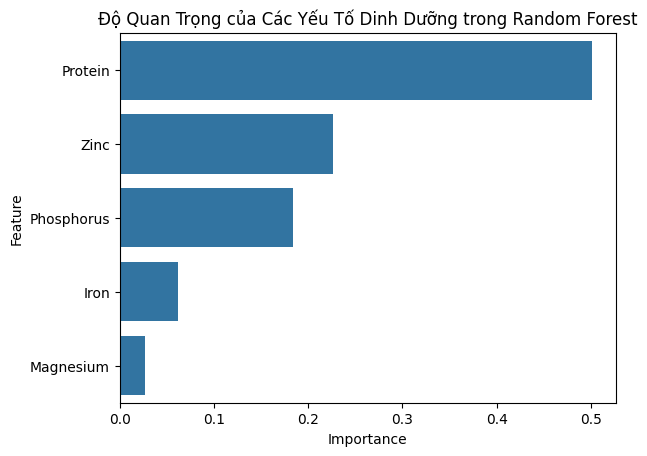

In [29]:
# Vẽ biểu đồ độ quan trọng
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Độ Quan Trọng của Các Yếu Tố Dinh Dưỡng trong Random Forest')
plt.show()